In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
shutil.copy("/content/drive/MyDrive/AI_Datasets/BW_DB.zip", "/content")

'/content/BW_DB.zip'

In [3]:
%cd /content/

/content


In [4]:
import os

In [5]:
import zipfile
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)

In [28]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import glob
import torch.optim as optim
import time
import cv2
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torchvision.datasets as datasets
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix
import math
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
%matplotlib inline

In [19]:
data_dir = '/content/BW_DB'
TRAIN_PATH = '/content/BW_DB/train'
TEST_PATH = '/content/BW_DB/test'
IMAGE_DIM=256
VAL_SPLIT = 0.1
print(os.listdir(data_dir))

['train', 'test']


In [23]:
def load_data(train_path, test_path, val_split, batch_size, input_size):
    transform_dict = {
                    'src': transforms.Compose([
                      
                      transforms.Resize(input_size),
                      transforms.RandomHorizontalFlip(), 
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
     ])}

    train_data = datasets.ImageFolder(root=train_path, transform=transform_dict['src'])
    test_data = datasets.ImageFolder(root=test_path, transform=transform_dict['src'])

    dataset_size = len(train_data)

    train_size = int((1-val_split)*dataset_size)
    val_size = int(val_split * dataset_size)

    # print(f"Dataset Size : {dataset_size}")
  
    # print(f"train Size : {train_size}")
    # print(f"Test Size : {test_size}")

    train_data, val_data = td.random_split(train_data, [train_size, val_size]) 
    
    data_loader_train = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_test  = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_val  = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    
    return data_loader_train, data_loader_test, data_loader_val

(48, 48)
(48, 48)
(48, 48)


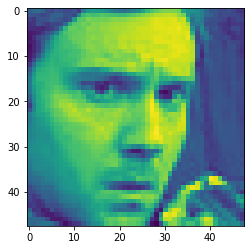

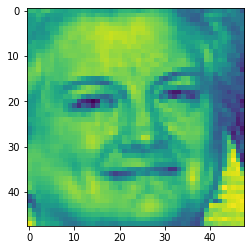

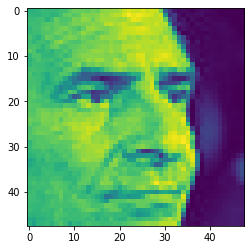

In [21]:
train_path = "/content/BW_DB/train/"
test_path = "/content/BW_DB/test/"

######## Write your code here ########
InterestedImage = image.imread(train_path+"/angry/0.jpg")
plt.figure()
plt.imshow(InterestedImage)
DisaapointedImage = image.imread(train_path+"/happy/100.jpg")
plt.figure()
plt.imshow(DisaapointedImage)
NeutralImage = image.imread(train_path+"/sad/10006.jpg")
plt.figure()
plt.imshow(NeutralImage)
print(NeutralImage.shape)
print(DisaapointedImage.shape)
print(NeutralImage.shape)

In [24]:
train_loader, test_loader, val_loader = load_data(TRAIN_PATH, TEST_PATH, VAL_SPLIT, 32, (128, 128))
print(len(train_loader), len(test_loader), len(val_loader))

254 44 29


In [ ]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = dataiter.next()
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))

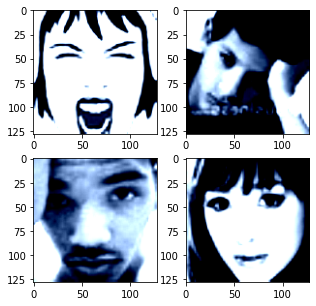

In [ ]:
plot_data_loader(train_loader, (2, 2))

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', weights=None)
n_classes = 3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);



Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


Device: cuda:0


In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);

Device: cuda:0


In [ ]:
for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        print(images.shape)
        #print(labels)
        if i == 5:
          break

torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])


In [ ]:
def evaluate(model, test_loader):
  model.eval() 
  with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader:
      images, labels = data[0].to(device), data[1].to(device)
      labels=torch.flatten(labels)
      outputs = model(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  accuracy = (correct / total) * 100
  model.train()
  return accuracy, loss.item()

In [ ]:
num_epochs = 50
total_steps = len(train_loader)
t1 = time.time()

training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []



for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _,predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        if (i + 1) % 50 == 0:
            val_accu, val_loss = evaluate(model, test_loader)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}, val_loss: {:.4f}, val_accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100, val_loss, val_accu))
            training_loss.append(loss.item())
            training_accuracy.append((correct / total) * 100)
            validation_accuracy.append(val_accu)
            validation_loss.append(val_loss)
            
print("######## Training Finished in {} seconds ###########".format(time.time()-t1))


Epoch [1/50], Step [50/282], Loss: 2.4404, Accuracy: 9.38, val_loss: 2.2101, val_accuracy: 16.39%
Epoch [1/50], Step [100/282], Loss: 1.8565, Accuracy: 15.62, val_loss: 1.9706, val_accuracy: 13.80%
Epoch [1/50], Step [150/282], Loss: 1.8248, Accuracy: 18.75, val_loss: 1.9383, val_accuracy: 11.43%
Epoch [1/50], Step [200/282], Loss: 1.7915, Accuracy: 18.75, val_loss: 1.8340, val_accuracy: 13.16%
Epoch [1/50], Step [250/282], Loss: 1.8052, Accuracy: 28.12, val_loss: 1.7814, val_accuracy: 18.40%
Epoch [2/50], Step [50/282], Loss: 1.9142, Accuracy: 15.62, val_loss: 1.8086, val_accuracy: 15.24%
Epoch [2/50], Step [100/282], Loss: 1.8979, Accuracy: 9.38, val_loss: 1.7629, val_accuracy: 16.53%
Epoch [2/50], Step [150/282], Loss: 1.8842, Accuracy: 9.38, val_loss: 1.7878, val_accuracy: 16.89%
Epoch [2/50], Step [200/282], Loss: 1.7866, Accuracy: 25.00, val_loss: 1.8230, val_accuracy: 16.10%
Epoch [2/50], Step [250/282], Loss: 1.7234, Accuracy: 25.00, val_loss: 1.6810, val_accuracy: 21.35%
Epoch

In [ ]:
PATH = "/content/Model/vgg19_BW.pt"
torch.save(model.state_dict(), PATH)

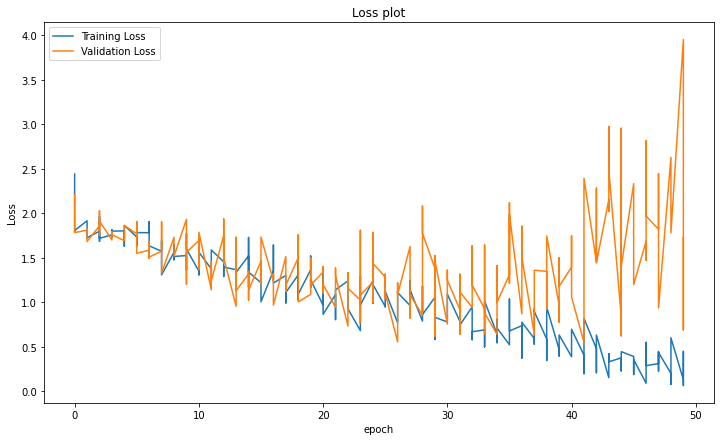

In [ ]:
epochs = [i//5 for i in range(num_epochs*5)]
plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(epochs,training_loss,label='Training Loss')
plt.plot(epochs,validation_loss,label='Validation Loss')

plt.legend()
plt.savefig('Loss_Vgg19_BW.png')

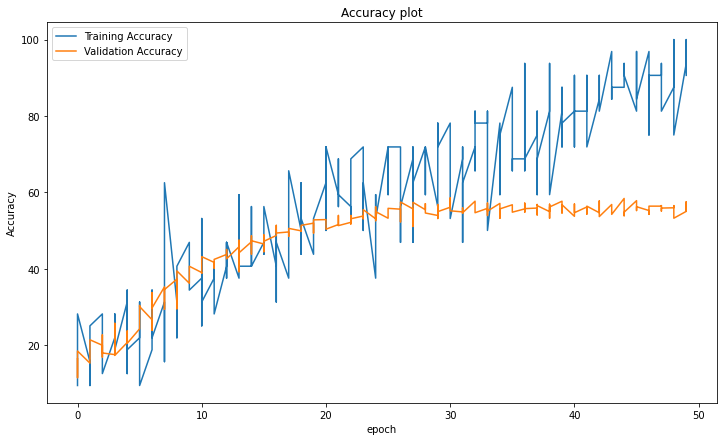

In [ ]:
epochs = [i//5 for i in range(num_epochs*5)]
plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs,training_accuracy,label='Training Accuracy') 
plt.plot(epochs,validation_accuracy,label='Validation Accuracy')  
plt.legend()
plt.savefig('Accuracy_Vgg19_BW.png')

In [27]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19')
 
model.load_state_dict(torch.load('/content/vgg19_BW.pt'))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device)

model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Device: cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

[[ 65  43  19  32  23  10]
 [ 12 103   9  40  24  16]
 [  5  13 288  36   5  18]
 [  8  32  31 127  30  15]
 [ 12  54  16  69  70   7]
 [  1  24   4   6   2 122]]
              precision    recall  f1-score   support

       angry       0.63      0.34      0.44       192
        fear       0.38      0.50      0.44       204
       happy       0.78      0.79      0.79       365
     neutral       0.41      0.52      0.46       243
         sad       0.45      0.31      0.37       228
    surprise       0.65      0.77      0.70       159

    accuracy                           0.56      1391
   macro avg       0.55      0.54      0.53      1391
weighted avg       0.57      0.56      0.55      1391



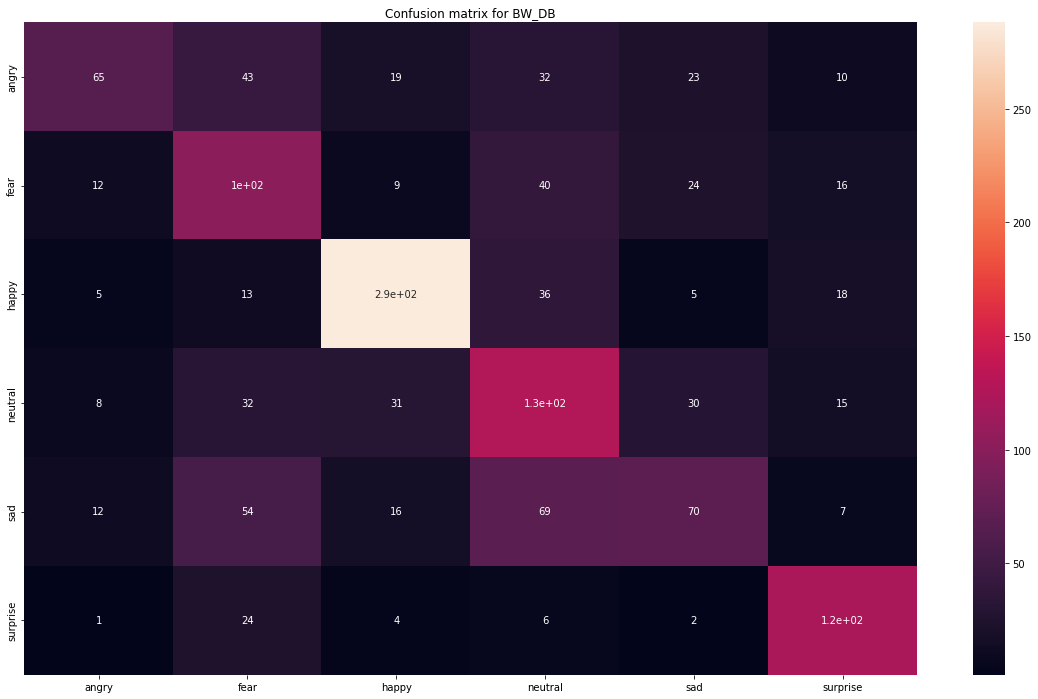

In [29]:
y_pred = []
y_true = []
for i, data in enumerate(test_loader):
    
    inputs, labels = data[0].to(device), data[1].to(device)
    output = model(inputs) # Feed Network
    
    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction
    labels = labels.data.cpu().numpy()
    y_true.extend(labels) # Save Truth

# constant for classes
# classes = ('neutral', 'interested', 'Disappointed')
classes = ('angry', 'fear', 'happy', 'neutral', 'sad', 'surprise')



# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

import seaborn as sns

# sns.heatmap(cf_matrix, annot=True)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                      columns = [i for i in classes])

plt.figure(figsize = (20,12))
sn.heatmap(df_cm, annot=True)
plt.title(f'Confusion matrix for BW_DB')
plt.savefig('Confusion_matrix_VGG_BW.png')
print(classification_report(y_true, y_pred, target_names=['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']))